In [1]:
!pip install pycaret


In [2]:
import pandas as pd
from pycaret.regression import *

In [4]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


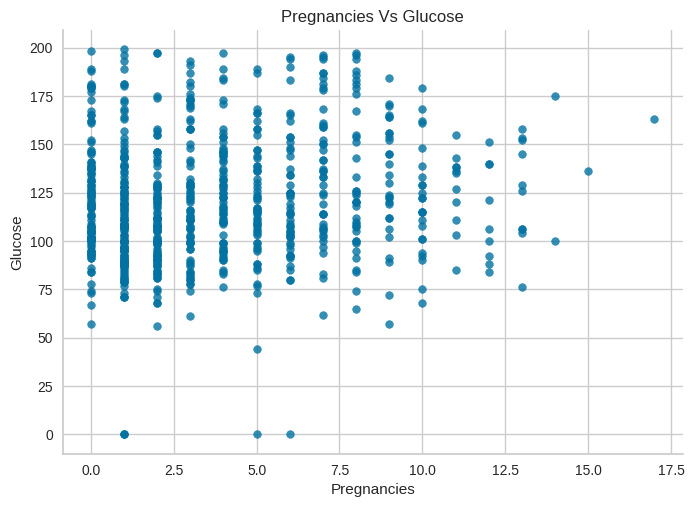

In [6]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pregnancies', y='Glucose',title='Pregnancies Vs Glucose',s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#df['SkinThickness'].drop(columns=df['SkinThickness'])

In [18]:
#df.drop(columns=['SkinThickness'])


In [19]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1)

In [21]:
from pycaret.regression import *
regression1 = setup(df, target = 'Outcome', session_id=123, log_experiment=False, experiment_name='df1_regression')

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Regression
3,Original data shape,"(768, 8)"
4,Transformed data shape,"(768, 8)"
5,Transformed train set shape,"(537, 8)"
6,Transformed test set shape,"(231, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [25]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3177,0.1666,0.4064,0.2406,0.2863,0.4670,0.1460
rf,Random Forest Regressor,0.3151,0.1677,0.4068,0.2386,0.2864,0.4601,0.3120
ridge,Ridge Regression,0.3455,0.1674,0.4084,0.2379,0.2865,0.4944,0.0200
lr,Linear Regression,0.3454,0.1674,0.4084,0.2377,0.2865,0.4944,0.9950
lar,Least Angle Regression,0.3443,0.1676,0.4087,0.2366,0.2863,0.4928,0.0220
br,Bayesian Ridge,0.3496,0.1681,0.4094,0.2351,0.2876,0.5011,0.0190
gbr,Gradient Boosting Regressor,0.3203,0.1688,0.4084,0.2344,0.2878,0.4686,0.1350
huber,Huber Regressor,0.3367,0.1750,0.4171,0.2030,0.2874,0.5215,0.0670
en,Elastic Net,0.3676,0.1769,0.4200,0.1951,0.2935,0.5414,0.0180
ada,AdaBoost Regressor,0.3773,0.1790,0.4224,0.1865,0.3032,0.4944,0.0560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [26]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4074,0.4074,0.6383,-0.8887,0.4425,0.6471
1,0.3704,0.3704,0.6086,-0.4897,0.4219,0.5200
2,0.3148,0.3148,0.5611,-0.4595,0.3889,0.2941
3,0.3333,0.3333,0.5774,-0.5000,0.4003,0.6111
4,0.2778,0.2778,0.5270,-0.3846,0.3654,0.4000
5,0.2778,0.2778,0.5270,-0.3846,0.3654,0.3333
6,0.2593,0.2593,0.5092,-0.2434,0.3530,0.4375
7,0.3585,0.3585,0.5987,-0.5258,0.4151,0.4000
8,0.1887,0.1887,0.4344,0.1587,0.3011,0.2778


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
# Print the best model
print(best_model)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [38]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [33]:
tuned_model = tune_model(dt, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2407,0.2407,0.4907,-0.1161,0.3402,0.5294
1,0.4074,0.4074,0.6383,-0.6386,0.4425,0.6800
2,0.2037,0.2037,0.4513,0.0556,0.3129,0.4706
3,0.3148,0.3148,0.5611,-0.4167,0.3890,0.7778
4,0.3148,0.3148,0.5611,-0.5692,0.3890,0.7333
5,0.2593,0.2593,0.5092,-0.2923,0.3530,0.5333
6,0.2407,0.2407,0.4907,-0.1546,0.3402,0.6875
7,0.2642,0.2642,0.5140,-0.1242,0.3563,0.4500
8,0.1509,0.1509,0.3885,0.3270,0.2694,0.4444


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
final_model = finalize_model(tuned_model)

In [35]:
predictions = predict_model(final_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.2208,0.2208,0.4699,0.0507,0.3258,0.3882


In [36]:
# Extract true and predicted values
true_values = test['Outcome']
# Verify the actual column name in predictions
print(predictions.columns)

# Replace 'Label' with the correct column name based on the output above
predicted_values = predictions['prediction_label']  # Update 'Label' if the column name is different

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'prediction_label'],
      dtype='object')


In [39]:
# Calculate metrics
ac=accuracy_score(true_values, predicted_values)
re=recall_score(true_values, predicted_values)
pr=precision_score(true_values, predicted_values)
f1=f1_score(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
mae = mean_absolute_error(true_values, predicted_values)
rmse = root_mean_squared_error(true_values, predicted_values)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Accuracy Score: {ac}")
print(f"Recall Score: {re}")
print(f"Precision Score: {pr}")
print(f"F1 Score: {f1}")

Mean Squared Error: 0.22077922077922077
R-squared: 0.050684931506849606
Mean Absolute Error: 0.22077922077922077
Root Mean Squared Error: 0.4698714938993648
Accuracy Score: 0.7792207792207793
Recall Score: 0.611764705882353
Precision Score: 0.7428571428571429
F1 Score: 0.6709677419354839


In [40]:
# Save the model for later use
save_model(final_model, 'df1_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                                        max_features=1.0,
                                        min_impurity_decrease=0.002,
                                        min_samples_leaf=5, min_samples_split=5,
                                        random_state=123))]),
 